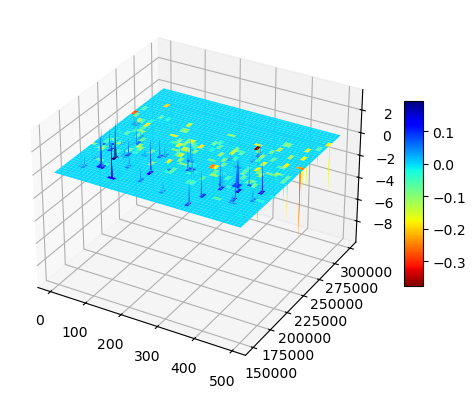

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 75
np.random.seed(NPM)

makan =  pd.read_csv("makanan_filled.csv")
# Fill NaN values in 'harga' column with 0
makan['harga'] = makan['harga'].fillna(0)
# mohon ditambahkan (lagi) agar lebih beragam

budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 62), dtype=np.double) # Changed to 62 to accommodate 2 selections per day for 31 days

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0

    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*i]= pilihan # Changed index to 2*i

        # makan keduas
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*i+1]= pilihan # Changed index to 2*i+1

    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")

    # Check if budget is within the desired range before calculating the index
    if SISA_MININUM <= budget < SISA_MAKSIMUM:
        resp_sehat[n][ int((budget-SISA_MININUM)/1000)]= skor_sehat


# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
# Colorize the surface using a colormap
surf = ax.plot_surface(X, Y, resp_sehat,
                       cmap='jet_r',   # try 'plasma', 'coolwarm', etc.
                       edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# plot yang ini barangkali butuh dipercantik

# TUGAS
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

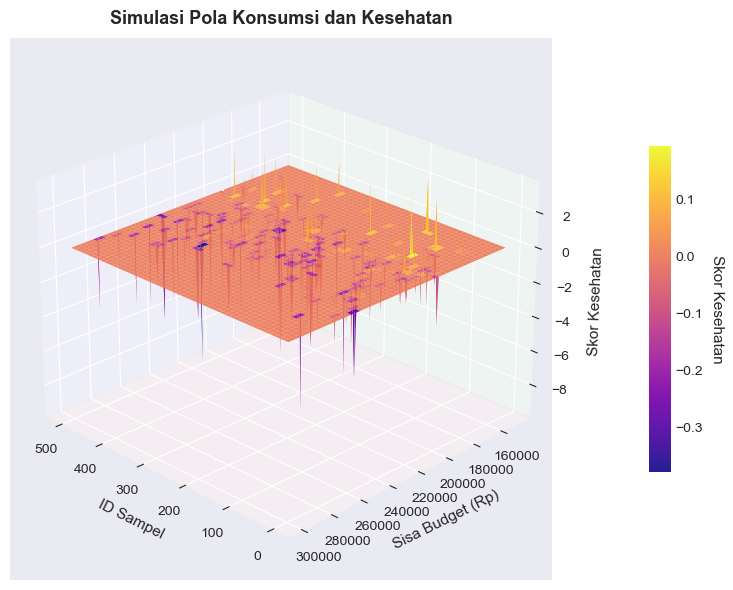

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # pastikan diimpor

# Data awal
NPM = 75
np.random.seed(NPM)

makan = pd.read_csv("makanan_filled.csv")
makan['harga'] = makan['harga'].fillna(0)

budget = 1e6  # rupiah

wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

skor_kumulatif = 0.0
SAMPLE_NUM = 500

sampleid = np.arange(0, SAMPLE_NUM)
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # 31 hari
        # Makan pertama
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )

        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2 * i] = pilihan

        # Makan kedua
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base + 0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base * 2, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )

        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2 * i + 1] = pilihan

    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    if SISA_MININUM <= budget < SISA_MAKSIMUM:
        resp_sehat[n][int((budget - SISA_MININUM) / 1000)] = skor_sehat

plt.style.use('seaborn-v0_8-darkgrid')  # tema visual lebih modern

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

Y, X = np.meshgrid(bin_sisa, sampleid)

# Tambahkan permukaan berwarna dengan transparansi
surf = ax.plot_surface(
    X, Y, resp_sehat,
    cmap='plasma',      
    linewidth=0,
    antialiased=True,
    alpha=0.9
)

# Tambahkan colorbar di samping
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.1)
cbar.set_label('Skor Kesehatan', fontsize=11, rotation=270, labelpad=15)

# Label sumbu dan judul
ax.set_xlabel("ID Sampel", fontsize=11)
ax.set_ylabel("Sisa Budget (Rp)", fontsize=11)
ax.set_zlabel("Skor Kesehatan", fontsize=11)
ax.set_title("Simulasi Pola Konsumsi dan Kesehatan", fontsize=13, fontweight='bold', pad=10)

# Ubah tampilan grid dan latar
ax.xaxis.pane.set_facecolor((0.95, 0.95, 1.0, 0.8))
ax.yaxis.pane.set_facecolor((0.95, 1.0, 0.95, 0.8))
ax.zaxis.pane.set_facecolor((1.0, 0.95, 0.95, 0.8))
ax.grid(True, linestyle="--", linewidth=0.5)

# Ubah sudut pandang agar lebih dramatis
ax.view_init(elev=25, azim=135)
plt.tight_layout()
plt.show()


Jumlah pola makan sehat ditemukan: 133 dari 500 sampel

Makanan yang paling sering muncul pada pola sehat:
   id_makanan  frekuensi nama_makanan
0           8        834       capcay
1           1        761   nasipadang
2          12        748       warteg
3           5        739   nasigoreng
4           2        682      mieayam
5           0        668   ayamgeprek
6          11        611   nasi telur
7           4        582       cireng
8           3        569        bakso
9          10        535         roti


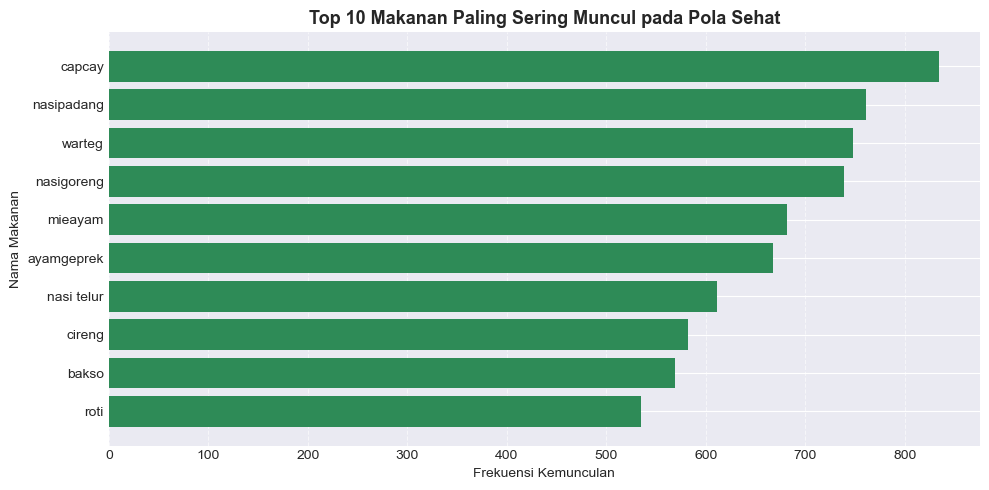

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

NPM = 75
np.random.seed(NPM)

makan = pd.read_csv("makanan_filled.csv")
makan['harga'] = makan['harga'].fillna(0)

budget_awal = 1e6  # rupiah

wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)
SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)

resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)
skor_kumulatif = np.zeros(SAMPLE_NUM)
sisa_budget = np.zeros(SAMPLE_NUM)
skor_sehat = np.zeros(SAMPLE_NUM)

for n in range(SAMPLE_NUM):
    budget = budget_awal
    total_skor = 0
    total_sehat = 0

    for i in range(31):
        # Makan 1
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(wkenyang_base, 0.2)
        w_rasa = np.random.normal(wrasa_base, 0.2)
        w_sehat = np.random.normal(wsehat_base, 0.4)
        w_bosan = np.random.normal(wbosan_base, 0.2)
        total_skor += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        total_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2 * i] = pilihan

        # Makan 2
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(wkenyang_base, 0.2)
        w_rasa = np.random.normal(wrasa_base, 0.2)
        w_sehat = np.random.normal(wsehat_base + 0.2, 0.4)
        w_bosan = np.random.normal(wbosan_base * 2, 0.2)
        total_skor += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        total_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2 * i + 1] = pilihan

    skor_kumulatif[n] = total_skor
    sisa_budget[n] = budget
    skor_sehat[n] = total_sehat

    if SISA_MININUM <= budget < SISA_MAKSIMUM:
        resp_sehat[n][int((budget - SISA_MININUM) / 1000)] = total_sehat
        
# Ambil sample dengan skor_sehat > 0
mask_sehat = skor_sehat > 0
pola_sehat = resp_pilih[mask_sehat, :].astype(int)

print(f"Jumlah pola makan sehat ditemukan: {pola_sehat.shape[0]} dari {SAMPLE_NUM} sampel")

frekuensi = pd.Series(pola_sehat.flatten()).value_counts()
frekuensi = frekuensi.rename_axis('id_makanan').reset_index(name='frekuensi')
frekuensi['nama_makanan'] = frekuensi['id_makanan'].apply(lambda x: makan['makanan'][x] if x < len(makan) else None)

# Filter makanan valid
frekuensi = frekuensi.dropna(subset=['nama_makanan'])

# Urutkan berdasarkan frekuensi
frekuensi = frekuensi.sort_values('frekuensi', ascending=False)
print("\nMakanan yang paling sering muncul pada pola sehat:")
print(frekuensi.head(10))

plt.figure(figsize=(10,5))
plt.barh(frekuensi['nama_makanan'][:10][::-1], frekuensi['frekuensi'][:10][::-1], color='seagreen')
plt.xlabel("Frekuensi Kemunculan")
plt.ylabel("Nama Makanan")
plt.title("Top 10 Makanan Paling Sering Muncul pada Pola Sehat", fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Jumlah titik dengan sisa uang positif: 500 dari 500 sampel
Persentase: 100.00%

Statistik sisa uang (Rp) dari titik positif:
count       500.000000
mean     216400.000000
std       25029.361516
min      127000.000000
25%      200000.000000
50%      214500.000000
75%      232000.000000
max      301000.000000
dtype: float64


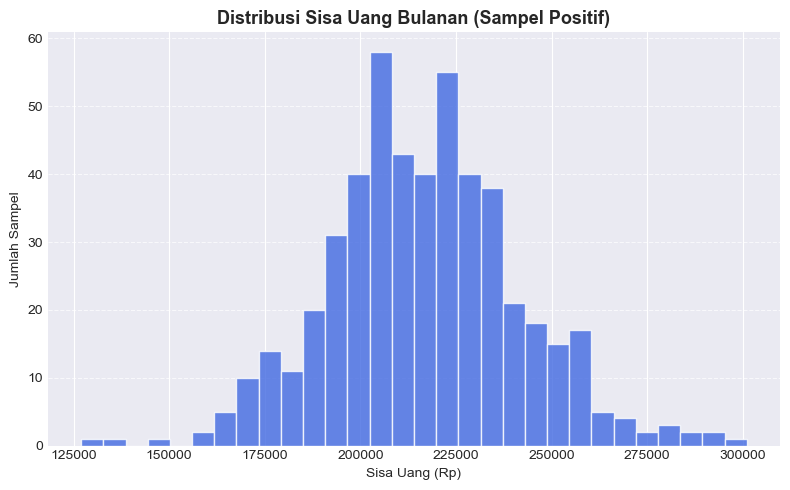

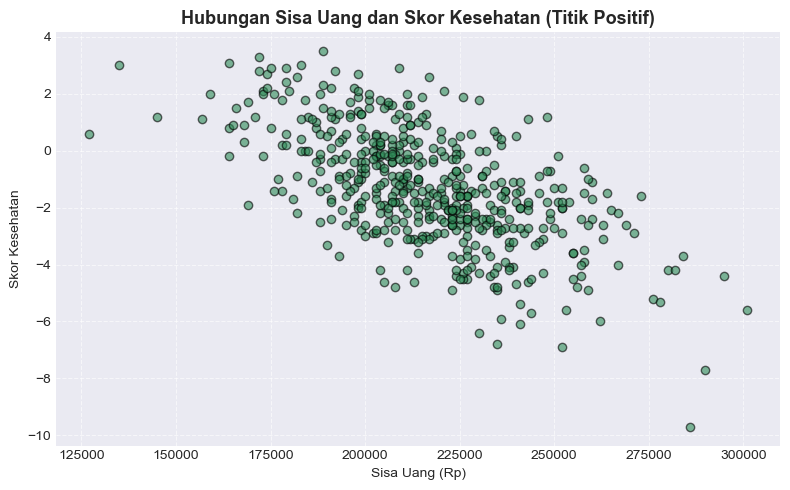

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mask_uang_positif = sisa_budget > 0
titik_positif = np.where(mask_uang_positif)[0]

print(f"Jumlah titik dengan sisa uang positif: {len(titik_positif)} dari {len(sisa_budget)} sampel")
print(f"Persentase: {len(titik_positif)/len(sisa_budget)*100:.2f}%")

data_uang = pd.Series(sisa_budget[mask_uang_positif])
print("\nStatistik sisa uang (Rp) dari titik positif:")
print(data_uang.describe())

plt.figure(figsize=(8,5))
plt.hist(sisa_budget[mask_uang_positif], bins=30, color='royalblue', edgecolor='white', alpha=0.8)
plt.title("Distribusi Sisa Uang Bulanan (Sampel Positif)", fontsize=13, fontweight='bold')
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(sisa_budget[mask_uang_positif], skor_sehat[mask_uang_positif],
            c='seagreen', alpha=0.6, edgecolor='k')
plt.title("Hubungan Sisa Uang dan Skor Kesehatan (Titik Positif)", fontsize=13, fontweight='bold')
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Kesehatan")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Titik dengan skor kumulatif tertinggi (namun sehat): 89
Skor kumulatif = 102.102
Skor kesehatan = 3.500
Sisa uang = Rp189,000

Makanan yang paling sering muncul pada titik ini:
mieayam       8
ayamgeprek    7
nasipadang    7
nasi telur    6
nasigoreng    6
warteg        6
bakso         5
capcay        5
cireng        4
roti          3
Name: count, dtype: int64


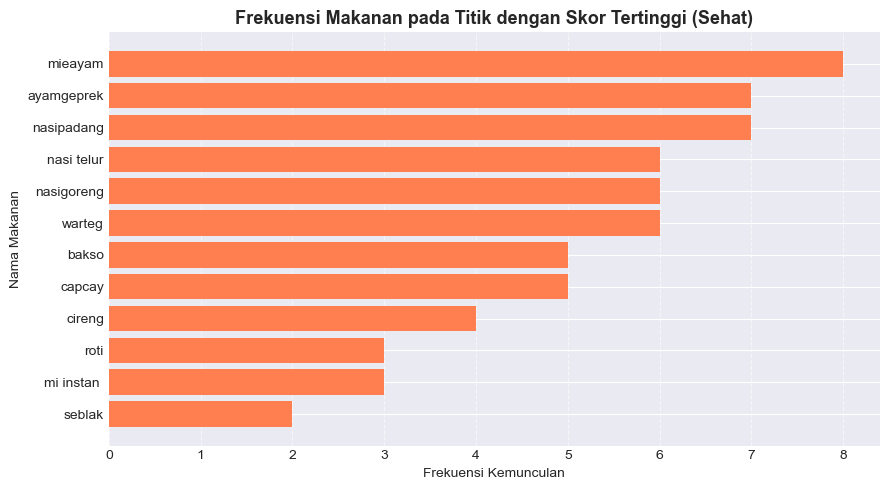

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mask_sehat = skor_sehat > 0
skor_sehat_positif = skor_sehat[mask_sehat]
skor_positif = skor[mask_sehat]

if len(skor_positif) > 0:
    idx_local = np.argmax(skor_positif)             
    idx_global = np.where(mask_sehat)[0][idx_local]  

    print(f"Titik dengan skor kumulatif tertinggi (namun sehat): {idx_global}")
    print(f"Skor kumulatif = {skor[idx_global]:.3f}")
    print(f"Skor kesehatan = {skor_sehat[idx_global]:.3f}")
    print(f"Sisa uang = Rp{int(sisa_budget[idx_global]):,}")

    pilihan_makanan_idx = resp_pilih[idx_global].astype(int)
    makanan_terpilih = [makan['makanan'][i] for i in pilihan_makanan_idx if i < len(makan)]
    frek_makan = pd.Series(makanan_terpilih).value_counts()

    print("\nMakanan yang paling sering muncul pada titik ini:")
    print(frek_makan.head(10))

    plt.figure(figsize=(9,5))
    plt.barh(frek_makan.index[::-1], frek_makan.values[::-1], color='coral')
    plt.title("Frekuensi Makanan pada Titik dengan Skor Tertinggi (Sehat)", fontsize=13, fontweight='bold')
    plt.xlabel("Frekuensi Kemunculan")
    plt.ylabel("Nama Makanan")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ditemukan titik dengan skor kesehatan positif.")


In [58]:
import pandas as pd

pilihan_makanan_idx = resp_pilih[idx_global].astype(int)

jadwal_makan = [makan['makanan'][i] for i in pilihan_makanan_idx if 0 <= i < len(makan)]

n_kelipatan3 = (len(jadwal_makan) // 3) * 3
jadwal_makan = jadwal_makan[:n_kelipatan3]

hari = [f"Hari ke-{i//3 + 1}" for i in range(n_kelipatan3)]
waktu = (["Pagi", "Siang", "Malam"] * (n_kelipatan3 // 3))[:n_kelipatan3]

df_jadwal = pd.DataFrame({
    "Hari": hari,
    "Waktu": waktu,
    "Makanan": jadwal_makan
})

print("=== Jadwal Makanan Berdasarkan Pilihan (resp_pilih) ===\n")
display(df_jadwal)

df_jadwal.to_csv("jadwal_makanan_pilihan.csv", index=False)

=== Jadwal Makanan Berdasarkan Pilihan (resp_pilih) ===



,Hari,Waktu,Makanan
0,Hari ke-1,Pagi,ayamgeprek
1,Hari ke-1,Siang,nasi telur
2,Hari ke-1,Malam,nasipadang
3,Hari ke-2,Pagi,cireng
4,Hari ke-2,Siang,nasi telur
5,Hari ke-2,Malam,nasipadang
6,Hari ke-3,Pagi,bakso
7,Hari ke-3,Siang,capcay
8,Hari ke-3,Malam,roti
9,Hari ke-4,Pagi,nasigoreng
